Rock Paper Scissors (using Convolutional Neural Network)

NAMA : Arif Zainurrohman

E-MAIL : arif.zainurrohman@yahoo.com

KELAS : MACHINE LEARNING UNTUK PEMULA

datasets : https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

https://www.tensorflow.org/tutorials/load_data/images


Import Library


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import os
import zipfile

print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Tensorflow version: 2.3.0
Keras version: 2.4.0


https://stackoverflow.com/questions/82831/how-do-i-check-whether-a-file-exists-without-exceptions


Create directory

In [ ]:
path = '/tmp/rockpaperscissors/'
    
os.path.exists(path) # Returns whether the path (directory or file) exists or not
os.path.isfile(path) # Returns whether the file exists or not

False

Download DataSet

In [ ]:
!wget --no-check-certificate / https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

/: Scheme missing.
--2020-10-26 07:21:22--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.1’

rockpaperscissors.z 100%[===================>] 307.92M  9.40MB/s    in 40s     

2020-10-26 07:22:03 (7.77 MB/s) - ‘rockpaperscissors.zip.1’ saved [322873683/322873683]

FINISHED --2020-10-26 07:22:03--
Total wall clock time: 40s
Downloaded: 1 files, 308M in 40s (7.77 MB/s)


https://codelabs.developers.google.com/codelabs/tensorflow-lab6-largecnns/

Get the data

In [ ]:
#Extreacting zip file
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/'
train_dir = os.path.join(base_dir, 'rps-cv-images')

print((os.listdir(base_dir)))
print((os.listdir(train_dir))) 

['rock', 'scissors', 'rps-cv-images', 'paper', 'README_rpc-cv-images.txt']
['rock', 'scissors', 'paper', 'README_rpc-cv-images.txt']


https://stackoverflow.com/questions/51748514/does-imagedatagenerator-add-more-images-to-my-dataset

https://stackoverflow.com/questions/56885269/how-to-work-with-a-kaggle-dataset-in-a-zip-file

https://keras.io/api/preprocessing/image/

Split the data into training and validation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, #scale images from integers 0-255 to floats 0-1.
    rotation_range=40, # Degree range for random rotations.
    shear_range=0.2, # Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,# zoom in or out in images
    horizontal_flip=True, # horizontal flip of images
    validation_split=0.4) # Data validation 0.4(40%)
    
train_generator = train_datagen.flow_from_directory(
    train_dir, # path to the directory to read images from
    target_size=(150, 150), # The dimensions to which all images found will be resized.
    batch_size=4, # size of the batches of data
    class_mode='categorical', # Default: "categorical"
    subset='training') # Subset of data ("training" or "validation")

validation_generator = validation_datagen.flow_from_directory(
    train_dir, # path to the directory to read images from
    target_size=(150, 150), # The dimensions to which all images found will be resized.
    batch_size=4, # size of the batches of data
    class_mode='categorical', # Default: "categorical"
    subset='validation') # Subset of data ("training" or "validation")

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


https://codelabs.developers.google.com/codelabs/tensorflow-lab6-largecnns/

https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/rock_paper_scissors_cnn/rock_paper_scissors_cnn.ipynb#scrollTo=oJcmE__0Lt8r

https://keras.io/api/optimizers/


Define the model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')       
])
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

https://codelabs.developers.google.com/codelabs/tensorflow-lab6-largecnns/

Train the model

In [ ]:
history = model.fit(
    train_generator,  
    steps_per_epoch = 18,
    epochs=15,
    validation_data=validation_generator, 
    shuffle=True,
    validation_steps=4,
    verbose=2
)

Epoch 1/15
18/18 - 3s - loss: 0.4110 - accuracy: 0.8472 - val_loss: 0.2864 - val_accuracy: 1.0000
Epoch 2/15
18/18 - 3s - loss: 0.3523 - accuracy: 0.9028 - val_loss: 0.3058 - val_accuracy: 0.9375
Epoch 3/15
18/18 - 3s - loss: 0.3032 - accuracy: 0.8889 - val_loss: 0.2709 - val_accuracy: 0.8750
Epoch 4/15
18/18 - 3s - loss: 0.1634 - accuracy: 0.9444 - val_loss: 0.1825 - val_accuracy: 0.9375
Epoch 5/15
18/18 - 3s - loss: 0.2547 - accuracy: 0.9583 - val_loss: 0.1195 - val_accuracy: 0.9375
Epoch 6/15
18/18 - 3s - loss: 0.3065 - accuracy: 0.8750 - val_loss: 0.2514 - val_accuracy: 0.8750
Epoch 7/15
18/18 - 3s - loss: 0.1979 - accuracy: 0.9429 - val_loss: 0.0310 - val_accuracy: 1.0000
Epoch 8/15
18/18 - 3s - loss: 0.4425 - accuracy: 0.8472 - val_loss: 0.2968 - val_accuracy: 0.8750
Epoch 9/15
18/18 - 3s - loss: 0.2792 - accuracy: 0.8889 - val_loss: 1.5763 - val_accuracy: 0.8125
Epoch 10/15
18/18 - 3s - loss: 0.1320 - accuracy: 0.9583 - val_loss: 0.6588 - val_accuracy: 0.8125
Epoch 11/15
18/18 -

Text(0.5, 1.0, 'Training VS Validation Accuracy')

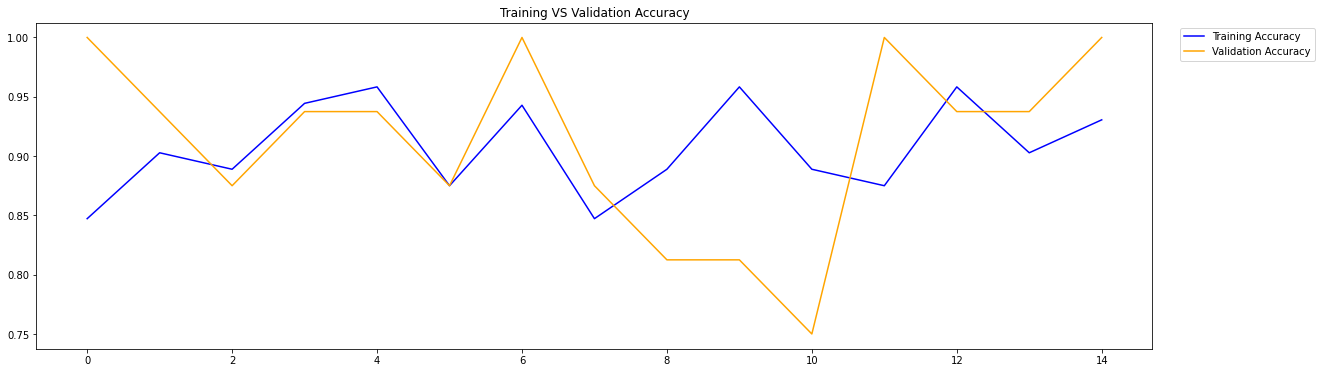

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs=range(len(acc)) 
plt.figure(figsize=(20, 6))

plt.plot(epochs, acc,color='blue', label='Training Accuracy')
plt.plot(epochs, val_acc,color='orange', label='Validation Accuracy')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right')
plt.title('Training VS Validation Accuracy')


Saving 3sKeYzYsjbWQVhc4.png to 3sKeYzYsjbWQVhc4.png


RESULT
paper


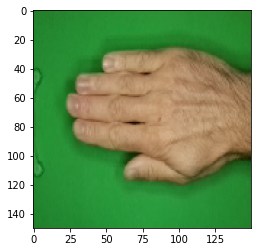

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  result = np.array_str(classes) 

  #print(classes)
  #print(result)
  
  paper     = "[[1. 0. 0.]]"
  rock      = "[[0. 1. 0.]]"
  scissors  = "[[0. 0. 1.]]"

  print('\n')
  print('RESULT')
 
  if result == paper :
     print("paper")
  elif result == rock :
     print("rock")
  elif result == scissors :
     print("scissors")
  else :
     print("Undefined")